In [1]:
# import libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns 
import html
from bs4 import BeautifulSoup
import requests
import os
from selenium import webdriver
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import warnings; warnings.simplefilter('ignore')
from VE_scraper_functions import *
from chromedriver_py import binary_path # this will get you the path variable
from selenium.webdriver.common.by import By
import time
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eric.Englin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
path = "park_scrape_content_dataset.xlsx"
park_scrape_dataset2 = pd.read_excel(path)


In [3]:
park_scrape_dataset2.head()

,Unnamed: 0,index,website page,content,website location,park
0,0,0,https://home.nps.gov/abli/planyourvisit/direct...,Directions - Abraham Lincoln Birthplace Nation...,NaN,ABLI
1,1,1,https://home.nps.gov/abli/planyourvisit/direct...,Directions - Abraham Lincoln Birthplace Nation...,NaN,ABLI
2,2,2,https://home.nps.gov/abli/planyourvisit/direct...,Directions - Abraham Lincoln Birthplace Nation...,NaN,ABLI
3,3,3,https://home.nps.gov/abli/planyourvisit/direct...,Directions - Abraham Lincoln Birthplace Nation...,NaN,ABLI
4,4,4,https://home.nps.gov/abli/planyourvisit/direct...,Directions - Abraham Lincoln Birthplace Nation...,NaN,ABLI


In [27]:
park_scrape_dataset2.shape

(14668, 6)

In [29]:
len(park_scrape_dataset2.park.unique())

420

In [42]:
df = pd.read_excel(r"C:\Users\Eric.Englin\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Enhancing Trip Planning Information\Park Typology Dataset 3.xlsx",
                  sheet_name = "Sheet1")

In [43]:
df.head()

,NPS name,Park name simplified,Park Alpha,Setting,2012,2016,2019,2022,Avg 2003-2022,Size (acres),visitation patterns,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,NaN,rural,169515,252495,238226,265707,2.129555e+05,344.50,NaN,NaN,NaN,NaN,NaN,NaN
1,Acadia National Park,Acadia,ACAD,rural,2431052,3303393,3437286,3970260,2.735741e+06,49071.40,2. Seasonal,NaN,NaN,NaN,1.0,NaN
2,Adams National Historical Park,Adams,ADAM,urban,336031,199301,187400,12848,1.850850e+05,23.82,NaN,NaN,NaN,NaN,NaN,NaN
3,African Burial Ground National Monument,African Burial Ground,AFBG,urban,77624,46526,47427,29743,5.667331e+04,0.35,NaN,NaN,NaN,NaN,NaN,NaN
4,Agate Fossil Beds National Monument,Agate Fossil Beds,AGFO,rural,11824,15555,16657,16357,1.466515e+04,3057.87,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
park_scrape_dataset2['website location'][25][:3]

'NPS'

In [33]:
park_scrape_dataset2_agg = park_scrape_dataset2.groupby('park').agg(
    {'website page': 'count'}).reset_index().sort_values(by = ['website page'], ascending = False)



In [34]:
park_scrape_dataset2_agg

,park,website page
415,YELL,148
317,PORE,130
167,GRCA,128
201,ISRO,109
99,DENA,108
...,...,...
203,JAZZ,8
151,FRST,8
339,SAGU,8
66,CBGN,4


In [46]:
park_scrape_dataset2_agg = park_scrape_dataset2_agg.merge(df, how='left', left_on = 'park', right_on = 'Park Alpha')

In [47]:
park_scrape_dataset2_agg

,park,website page,NPS name,Park name simplified,Park Alpha,Setting,2012,2016,2019,2022,Avg 2003-2022,Size (acres),visitation patterns,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove
0,YELL,148,Yellowstone National Park,Yellowstone,YELL,rural,3447729.0,4257177.0,4020288.0,3290242.0,3542699.55,2219790.71,2. Seasonal,NaN,NaN,NaN,1.0,NaN
1,PORE,130,Point Reyes National Seashore,Point Reyes,PORE,rural,2412663.0,2438442.0,2265301.0,2336202.0,2296725.70,71053.38,2. Seasonal,NaN,NaN,NaN,NaN,NaN
2,GRCA,128,Grand Canyon National Park,Grand Canyon,GRCA,rural,4421352.0,5969811.0,5974411.0,4732101.0,4750511.95,1201647.03,2. Seasonal,NaN,NaN,NaN,1.0,NaN
3,ISRO,109,Isle Royale National Park,Isle Royale,ISRO,rural,16663.0,24966.0,26410.0,25454.0,18761.75,571790.30,NaN,NaN,NaN,NaN,NaN,NaN
4,DENA,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,JAZZ,8,New Orleans Jazz National Historical Park,New Orleans Jazz,JAZZ,urban,177909.0,35514.0,41049.0,37410.0,64255.05,5.13,NaN,NaN,NaN,NaN,NaN,NaN
419,FRST,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,SAGU,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,CBGN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


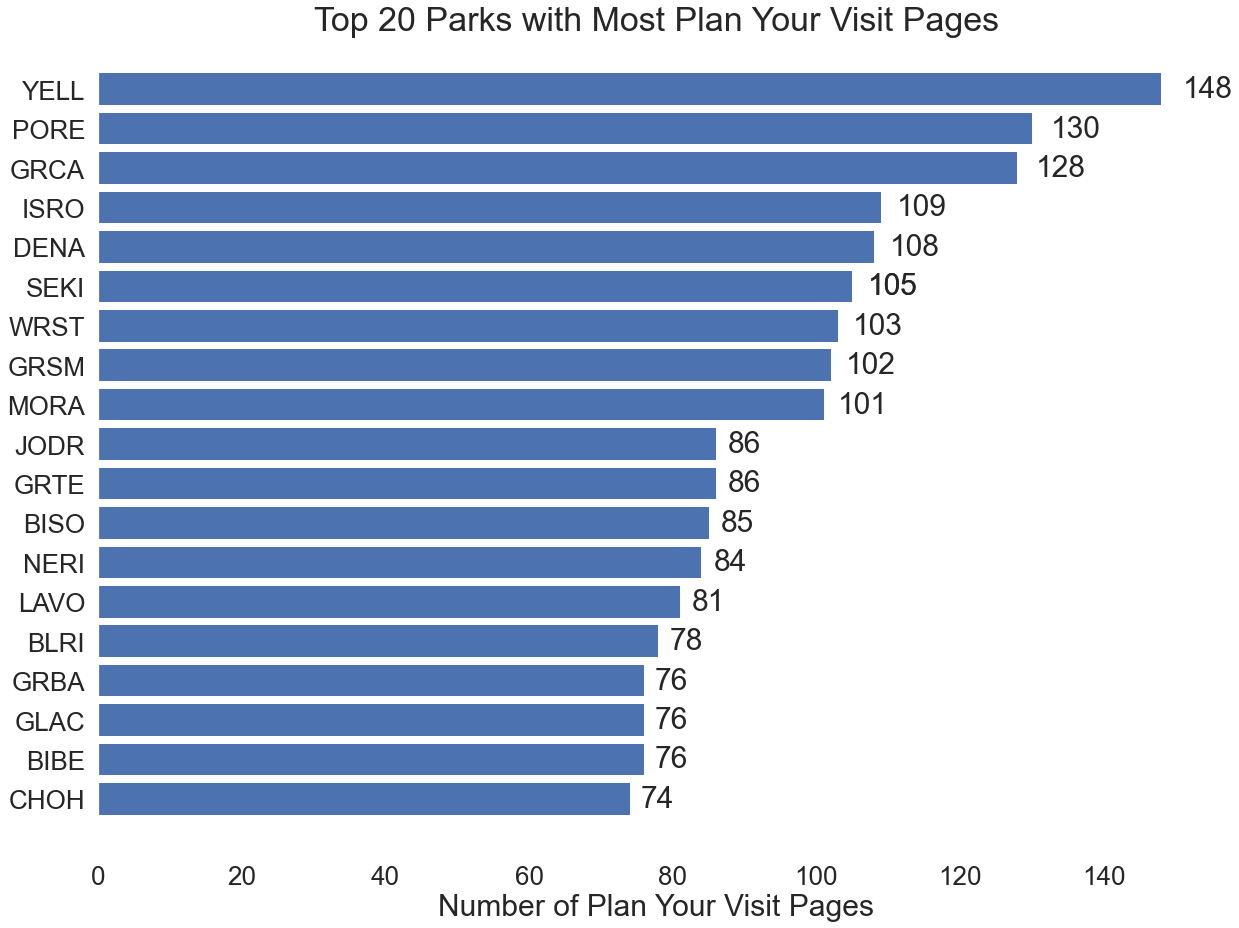

In [74]:
import matplotlib.ticker as ticker
import seaborn as sns 

plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})


bar_labels = park_scrape_dataset2_agg['park'][:20]

fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26, rotation = 45)
title = "Top 20 Parks with Most Plan Your Visit Pages"
ax.set_title(title, fontsize=34)

bars = ax.barh(width = park_scrape_dataset2_agg['website page'][:20], y = bar_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Plan Your Visit Pages',fontsize = 30) #xlabel
ax.tick_params(axis='x', which='major', labelsize=26)
ax.tick_params(axis='y', which='major', labelsize=30)

for bar in bars:
    width = bar.get_width() #Previously we got the height
    label = '{:,}'.format(width)
    label_y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=30)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(26)



plt.show()

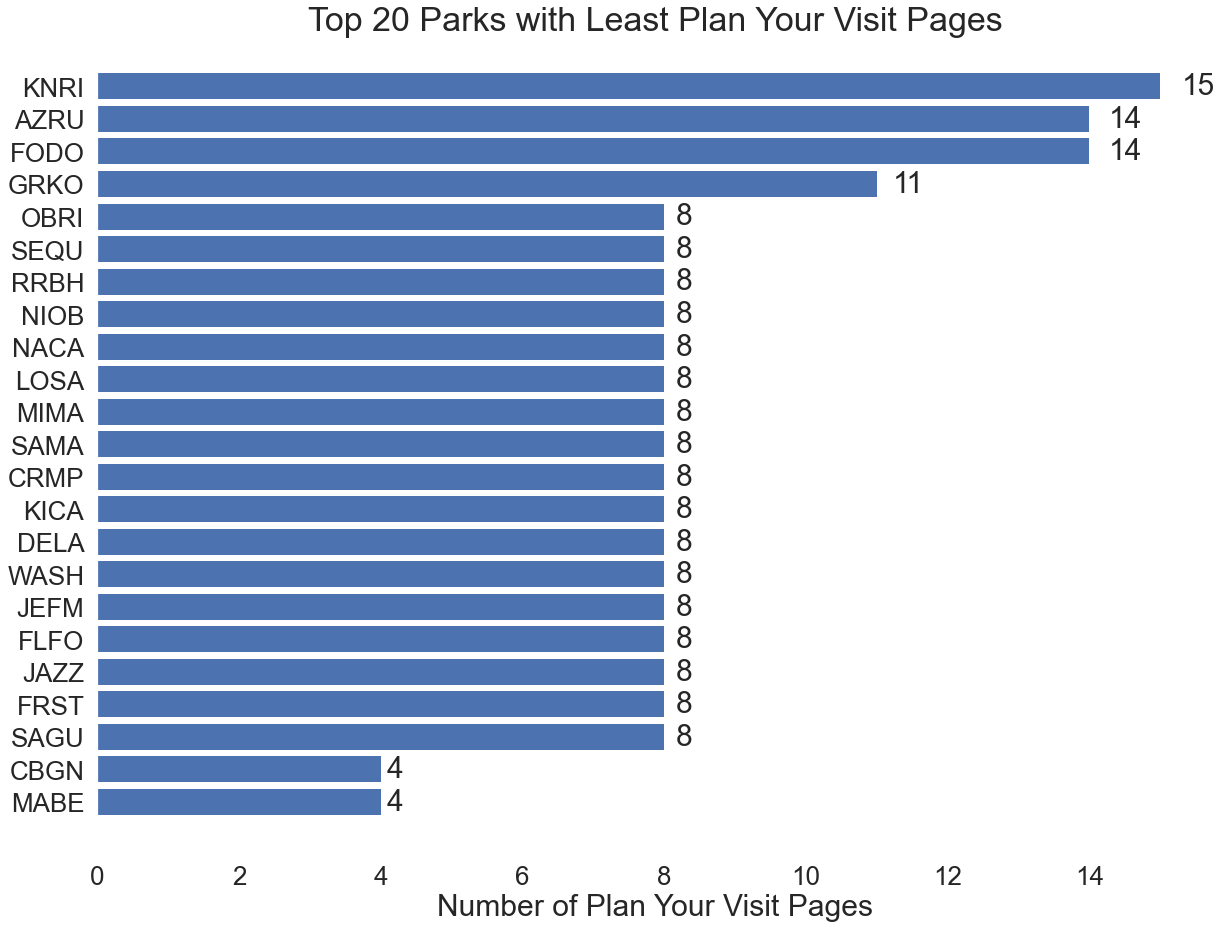

In [83]:
import matplotlib.ticker as ticker
import seaborn as sns 

plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})


bar_labels = park_scrape_dataset2_agg['park'][400:]

fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26, rotation = 45)
title = "Top 20 Parks with Least Plan Your Visit Pages"
ax.set_title(title, fontsize=34)

bars = ax.barh(width = park_scrape_dataset2_agg['website page'][400:], y = bar_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Plan Your Visit Pages',fontsize = 30) #xlabel
ax.tick_params(axis='x', which='major', labelsize=26)
ax.tick_params(axis='y', which='major', labelsize=30)

for bar in bars:
    width = bar.get_width() #Previously we got the height
    label = '{:,}'.format(width)
    label_y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=30)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(26)



plt.show()

In [65]:
park_scrape_dataset2_agg['page_count']= park_scrape_dataset2_agg['website page']
park_scrape_dataset2_agg['avg_visitation']= park_scrape_dataset2_agg['Avg 2003-2022']

In [77]:
park_scrape_dataset2_agg.describe()

,website page,2012,2016,2019,2022,Avg 2003-2022,Size (acres),Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove,page_count,avg_visitation
count,423.000000,2.950000e+02,2.950000e+02,2.950000e+02,2.950000e+02,2.950000e+02,2.950000e+02,0.0,0.0,0.0,25.0,0.0,423.000000,2.950000e+02
mean,35.222222,6.815279e+05,7.933169e+05,8.023398e+05,7.450848e+05,7.078301e+05,9.647267e+04,NaN,NaN,NaN,1.0,NaN,35.222222,7.078301e+05
std,19.877773,1.422562e+06,1.653764e+06,1.685135e+06,1.614850e+06,1.486639e+06,3.251438e+05,NaN,NaN,NaN,0.0,NaN,19.877773,1.486639e+06
min,4.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.219231e+02,2.000000e-02,NaN,NaN,NaN,1.0,NaN,4.000000,8.219231e+02
25%,24.000000,4.099450e+04,5.400200e+04,4.805550e+04,3.994300e+04,4.841568e+04,1.702950e+02,NaN,NaN,NaN,1.0,NaN,24.000000,4.841568e+04
50%,30.000000,1.617430e+05,1.818390e+05,1.772240e+05,1.627550e+05,1.605360e+05,1.751000e+03,NaN,NaN,NaN,1.0,NaN,30.000000,1.605360e+05
75%,41.500000,6.075820e+05,7.551120e+05,6.894085e+05,6.996100e+05,6.483227e+05,3.884667e+04,NaN,NaN,NaN,1.0,NaN,41.500000,6.483227e+05
max,148.000000,1.454034e+07,1.563878e+07,1.500223e+07,1.563891e+07,1.441814e+07,3.408396e+06,NaN,NaN,NaN,1.0,NaN,148.000000,1.441814e+07


In [85]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource


source = ColumnDataSource(data=dict(
    x=park_scrape_dataset2_agg['website page'],
    y=park_scrape_dataset2_agg['Avg 2003-2022']))


TOOLTIPS = [
    ("Park Name", "$park"),
    ("")
]

fig = figure(width=900, height=900, tooltips=TOOLTIPS,
           title="Mouse over the dots")

# Add a scatter plot
fig.circle('x', 'y', source=source,
          size = 20)

# Show the figure
show(fig)

In [20]:
for x in range(len(park_scrape_dataset2):
    print(x)

TypeError: 'int' object is not iterable

In [26]:
for x in range(len(park_scrape_dataset2)):
    try: 
        if park_scrape_dataset2['website location'][x][:3] == "NPS":
            plan_your_visit_spot = park_scrape_dataset2['website location'][x].find("Plan Your Visit")
            print(plan_your_visit_spot+15)
            print(park_scrape_dataset2['website location'][x][plan_your_visit_spot+15:])
            print(park_scrape_dataset2['website page'][x])
    except:
        pass

31
Basic InformationCurrent Conditions
https://home.nps.gov/abli/planyourvisit/conditions.htm
31
Directions & Transportation
https://home.nps.gov/acad/planyourvisit/directions.htm#GlobalNav-toggle
31
Directions & Transportation
https://home.nps.gov/acad/planyourvisit/directions.htm#LocalNav-desktop-nav
31
Directions & Transportation
https://home.nps.gov/acad/planyourvisit/directions.htm#main
31
Directions & Transportation
https://home.nps.gov/acad/planyourvisit/directions.htm#ParkFooter
31
Directions & Transportation
https://home.nps.gov/acad/planyourvisit/directions.htm#GlobalFooter
31
Directions & Transportation
https://home.nps.gov/acad/planyourvisit/directions.htm#GlobalFooterSearch
31
Basic InformationFees & Passes
https://home.nps.gov/acad/planyourvisit/fees.htm
31
Places To GoEast SidePark Loop Road
https://home.nps.gov/acad/planyourvisit/park-loop-road.htm
31
Things To DoStargazing
https://home.nps.gov/acad/planyourvisit/stargazing.htm
31
Directions & Transportation
https://nps

31
Calendar
https://www.nps.gov/chsc/planyourvisit/calendar.htm
31
Directions & Transportation
https://home.nps.gov/chyo/planyourvisit/directions.htm#GlobalNav-toggle
31
Directions & Transportation
https://home.nps.gov/chyo/planyourvisit/directions.htm#LocalNav-desktop-nav
31
Directions & Transportation
https://home.nps.gov/chyo/planyourvisit/directions.htm#main
31
Directions & Transportation
https://home.nps.gov/chyo/planyourvisit/directions.htm#ParkFooter
31
Directions & Transportation
https://home.nps.gov/chyo/planyourvisit/directions.htm#GlobalFooter
31
Directions & Transportation
https://home.nps.gov/chyo/planyourvisit/directions.htm#GlobalFooterSearch
31

https://home.nps.gov/chyo/planyourvisit/index.htm
31
Basic InformationCurrent Conditions
https://home.nps.gov/chyo/planyourvisit/conditions.htm
31
Directions & TransportationMaps
https://home.nps.gov/chyo/planyourvisit/maps.htm
31
Directions & Transportation
https://home.nps.gov/ciro/planyourvisit/directions.htm#GlobalNav-toggle

31
Basic InformationOperating Hours & SeasonsWinter in Grand Teton
https://home.nps.gov/grte/planyourvisit/winter.htm
31
Basic InformationFees & Passes
https://home.nps.gov/grte/planyourvisit/fees.htm
31
Basic InformationPermits & ReservationsBackcountry Camping Permits
https://home.nps.gov/grte/planyourvisit/bcres.htm
31
Basic InformationPermits & ReservationsWedding and Commitment Ceremonies
https://home.nps.gov/grte/planyourvisit/weddingcommitments.htm
31
Basic InformationCurrent Conditions
https://home.nps.gov/grte/planyourvisit/conditions.htm
31
Basic InformationWeather
https://home.nps.gov/grte/planyourvisit/weather.htm
31
Directions & TransportationRoads
https://home.nps.gov/grte/planyourvisit/roads.htm
31
Directions & TransportationParking
https://home.nps.gov/grte/planyourvisit/parking.htm
31
Eating & SleepingLodging
https://home.nps.gov/grte/planyourvisit/lodging.htm
31
Eating & SleepingCampingGros Ventre Campground
https://home.nps.gov/grte/planyourvisit/gros-ventre-campgrou

31
Directions & Transportation
https://home.nps.gov/muwo/planyourvisit/directions.htm#LocalNav-desktop-nav
31
Directions & Transportation
https://home.nps.gov/muwo/planyourvisit/directions.htm#main
31
Directions & Transportation
https://home.nps.gov/muwo/planyourvisit/directions.htm#ParkFooter
31
Directions & Transportation
https://home.nps.gov/muwo/planyourvisit/directions.htm#GlobalFooter
31
Directions & Transportation
https://home.nps.gov/muwo/planyourvisit/directions.htm#GlobalFooterSearch
31
Basic InformationOperating Hours & Seasons
https://home.nps.gov/muwo/planyourvisit/hours.htm
31
Basic InformationWeather
https://home.nps.gov/muwo/planyourvisit/weather.htm
31
Things To Do
https://home.nps.gov/muwo/planyourvisit/things2do.htm
14
meLearn About the ParkPublications
https://home.nps.gov/muwo/planyourvisit/publications.htm
31
Directions & Transportation
https://www.nps.gov/nabr/planyourvisit/directions.htm#GlobalNav-toggle
31
Directions & Transportation
https://www.nps.gov/nabr/pl

31
SafetyUnderstanding Lake Navigation
https://www.nps.gov/voya/planyourvisit/lake-navigation.htm
31
SafetyUnderstanding Lake NavigationLake Navigation Buoy and Aides Reference Guide
https://www.nps.gov/voya/planyourvisit/lake-navigation-buoy-and-marker-reference-guide.htm
31
SafetyBears and Food Storage
https://www.nps.gov/voya/planyourvisit/bears-and-food-storage.htm
31
SafetyWinter Safety
https://www.nps.gov/voya/planyourvisit/winter-safety.htm
31
Accessibility
https://www.nps.gov/voya/planyourvisit/accessibility.htm
14
meLearn About the ParkNight SkiesStargazing
https://www.nps.gov/voya/planyourvisit/stargazing.htm
14
meLearn About the ParkKids & YouthBe A Junior Ranger
https://www.nps.gov/voya/planyourvisit/beajuniorranger.htm
14
meGet InvolvedDo Business With UsTour Boat Charters
https://www.nps.gov/voya/planyourvisit/tour-boat-charters.htm
31
Directions & TransportationMaps
https://www.nps.gov/voya/planyourvisit/maps.htm#CP_JUMP_3330973
31
Directions & TransportationMaps
https:/